**pandas demo**

Евгений Борисов borisov.e@solarl.ru

---

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
pd.options.display.max_colwidth = 200 # ширина таблицы pandas при печати
np.set_printoptions(precision=2) # вывод на печать до 2 знака

In [4]:
# from tqdm import tqdm
# tqdm.pandas() # progressbar для pandas 

---

In [5]:
# будем использовать модуль datasets библиотеки sklearn
# для получения модельных данных
from sklearn import __version__ as sklearn_version
print(sklearn_version)

0.24.0


In [6]:
# загружаем данные о цветах
from sklearn.datasets import load_iris
data = load_iris()

In [7]:
# структура содержит таблицу с цифрами, текстовое описание описание данных и др.

data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
set(data['target'])

{0, 1, 2}

In [13]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
data['filename']

'/usr/lib/python3.9/site-packages/sklearn/datasets/data/iris.csv'

---

In [15]:
# строим из данных Pandas DataFrame
df = pd.DataFrame(data['data'],columns=data['feature_names'])
print(len(df))
df

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
# добавляем слолбец target (номер класса)
df['target'] = data['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
# строим словарь  номер класса - название 
name_map = { i:s for i,s in enumerate(data['target_names']) } 
name_map

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [18]:
df['target_names'] = df['target'].map(name_map)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [19]:
# список столбцов
df.columns.to_list()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target',
 'target_names']

In [20]:
# первые строки таблицы
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


In [21]:
# последние строки таблицы
df.tail(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [22]:
# случайная выборка из таблицы
df.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
63,6.1,2.9,4.7,1.4,1,versicolor
137,6.4,3.1,5.5,1.8,2,virginica
129,7.2,3.0,5.8,1.6,2,virginica


In [23]:
# статистики по столбцам
df.describe(percentiles=[.1,.99])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
10%,4.800000,2.500000,1.400000,0.200000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
99%,7.700000,4.151000,6.700000,2.500000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


---

In [24]:
# выборка из таблицы
df[ df['sepal width (cm)']<2.3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
60,5.0,2.0,3.5,1.0,1,versicolor
62,6.0,2.2,4.0,1.0,1,versicolor
68,6.2,2.2,4.5,1.5,1,versicolor
119,6.0,2.2,5.0,1.5,2,virginica


---

In [25]:
# минимальные значения по классам
df.groupby('target_names').min()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
target_names,,,,,
setosa,4.3,2.3,1.0,0.1,0
versicolor,4.9,2.0,3.0,1.0,1
virginica,4.9,2.2,4.5,1.4,2


In [26]:
# количество по классам
df.groupby('target_names').count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
target_names,,,,,
setosa,50,50,50,50,50
versicolor,50,50,50,50,50
virginica,50,50,50,50,50


<AxesSubplot:>

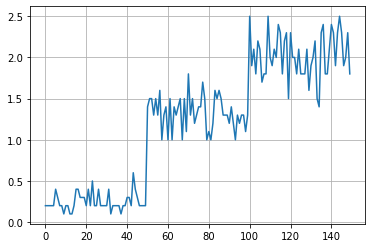

In [27]:
# простой график значений по слобцу 
df['petal width (cm)'].plot(grid=True)

<AxesSubplot:ylabel='Frequency'>

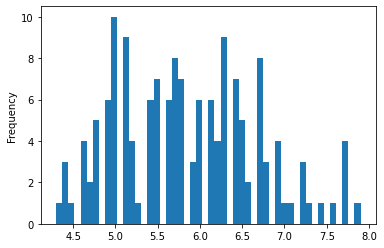

In [28]:
# гистограмма по столбцу
df['sepal length (cm)'].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

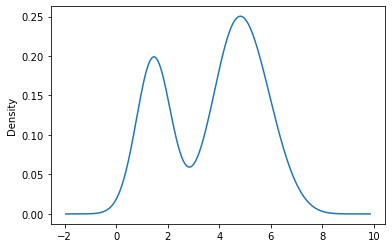

In [29]:
# оценка плотности распределения по столбцу
df['petal length (cm)'].plot.kde()

In [30]:
# df.merge()

In [31]:
# df['target_names'].map(lambda s: s.split('-'))

----

In [32]:
# количество пропусков в таблице
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_names         0
dtype: int64

In [33]:
# портим данные, 
# выкидываем значения из случайно выбранных ячеек

c = np.random.randint(0,df.columns.size,df.columns.size,)
r = np.random.randint(0,df.count()[0],df.count()[0])

df.iloc[r,c] = None

c,r

(array([4, 2, 5, 4, 3, 1]),
 array([ 95, 139, 133,  76, 140,  85,  45, 105,  71,  58,  29,  98,  64,
         74,  91,  35,  42, 135,  32,  18,  61, 112,  65,  87,  14,  45,
         93, 142,  48,   4,  10,  74,  77, 135, 118, 103,  28, 149, 133,
         17,   0, 105,  10,  29,  23, 136,  44,  79,  37,  69, 128, 113,
         22, 128,  45,  99,  94,  26,  67,  87,  64, 123,  59,  85, 105,
        101, 147, 107,  63,   6,  63, 141,  79,  93, 130,  62, 102,  91,
         34,   0, 118,  91, 146,  33,  60, 125,  20,  92,  20, 146, 141,
         91,  22, 114,  70, 119, 148,  89,  37, 109,   6, 145,  89, 111,
         53, 116, 136,  97,  30,  23,  59, 103,  89, 126,  30, 114,  62,
         14, 119,  48, 128,  72, 102,  20,  58,  51, 139, 121,  46,  93,
         80,  60,  54,  23,   0, 128, 117,   3,  56,  18,  65,   9,  63,
         79,  96,  89,  90, 137,   2, 111]))

In [34]:
# заполняем пропуски нулями
df.fillna(0)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,0.0,0.0,0.0,0.0,0
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,0.0,0.0,0.0,0.0,0
3,4.6,0.0,0.0,0.0,0.0,0
4,5.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...
145,6.7,0.0,0.0,0.0,0.0,0
146,6.3,0.0,0.0,0.0,0.0,0
147,6.5,0.0,0.0,0.0,0.0,0
148,6.2,0.0,0.0,0.0,0.0,0


In [35]:
# записи не содержащие пропусков
df[~df.isnull().any(axis=1)].head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
1,4.9,3.0,1.4,0.2,0.0,setosa
5,5.4,3.9,1.7,0.4,0.0,setosa
7,5.0,3.4,1.5,0.2,0.0,setosa
8,4.4,2.9,1.4,0.2,0.0,setosa
11,4.8,3.4,1.6,0.2,0.0,setosa


In [36]:
# количество пропусков в таблице
df.isnull().sum()

sepal length (cm)     0
sepal width (cm)     95
petal length (cm)    95
petal width (cm)     95
target               95
target_names         95
dtype: int64

In [37]:
df.dropna() # удаление записей с пропусками

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
1,4.9,3.0,1.4,0.2,0.0,setosa
5,5.4,3.9,1.7,0.4,0.0,setosa
7,5.0,3.4,1.5,0.2,0.0,setosa
8,4.4,2.9,1.4,0.2,0.0,setosa
11,4.8,3.4,1.6,0.2,0.0,setosa
12,4.8,3.0,1.4,0.1,0.0,setosa
13,4.3,3.0,1.1,0.1,0.0,setosa
15,5.7,4.4,1.5,0.4,0.0,setosa
16,5.4,3.9,1.3,0.4,0.0,setosa
19,5.1,3.8,1.5,0.3,0.0,setosa


In [38]:
df.fillna(.0) # заполнение пропусков

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,0.0,0.0,0.0,0.0,0.0
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,0.0,0.0,0.0,0.0,0.0
3,4.6,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
145,6.7,0.0,0.0,0.0,0.0,0.0
146,6.3,0.0,0.0,0.0,0.0,0.0
147,6.5,0.0,0.0,0.0,0.0,0.0
148,6.2,0.0,0.0,0.0,0.0,0.0


In [39]:
df.ffill() # заполнение пропусков из предыдущей строки

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,NaN,NaN,NaN,NaN,None
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.0,1.4,0.2,0.0,setosa
3,4.6,3.0,1.4,0.2,0.0,setosa
4,5.0,3.0,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.3,5.7,2.5,2.0,virginica
146,6.3,3.3,5.7,2.5,2.0,virginica
147,6.5,3.3,5.7,2.5,2.0,virginica
148,6.2,3.3,5.7,2.5,2.0,virginica


In [40]:
df.bfill()# заполнение пропусков из cледующей строки

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.0,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.9,1.7,0.4,0.0,setosa
3,4.6,3.9,1.7,0.4,0.0,setosa
4,5.0,3.9,1.7,0.4,0.0,setosa
...,...,...,...,...,...,...
145,6.7,NaN,NaN,NaN,NaN,None
146,6.3,NaN,NaN,NaN,NaN,None
147,6.5,NaN,NaN,NaN,NaN,None
148,6.2,NaN,NaN,NaN,NaN,None


In [41]:
df.ffill(axis=1) # заполнение пропусков из предыдущего стролбца

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,5.1,5.1,5.1,5.1,5.1
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,4.7,4.7,4.7,4.7,4.7
3,4.6,4.6,4.6,4.6,4.6,4.6
4,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...
145,6.7,6.7,6.7,6.7,6.7,6.7
146,6.3,6.3,6.3,6.3,6.3,6.3
147,6.5,6.5,6.5,6.5,6.5,6.5
148,6.2,6.2,6.2,6.2,6.2,6.2


In [42]:
df.bfill(axis=1) # заполнение пропусков из cледующей стролбца

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,NaN,NaN,NaN,NaN,NaN
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,NaN,NaN,NaN,NaN,NaN
3,4.6,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
145,6.7,NaN,NaN,NaN,NaN,NaN
146,6.3,NaN,NaN,NaN,NaN,NaN
147,6.5,NaN,NaN,NaN,NaN,NaN
148,6.2,NaN,NaN,NaN,NaN,NaN


----

In [43]:
# статистика по странам Евросоюза
# https://ec.europa.eu/eurostat

import eurostat

In [44]:
# список тем в источнике
toc = eurostat.get_toc_df().drop_duplicates()

In [45]:
toc.sample(20)

,title,code,type,last update of data,last table structure change,data start,data end
6886,"Enterprises that acquiesce or transfer resources and business activities within the enterprise group, NACE Rev. 2 activity and size class",inn_cis11_src,dataset,14.01.2021,08.02.2021,2018,2018
277,"Causes of death by NUTS 2 regions - crude death rate, 3 year average - total",hlth_cd_ycdrt,dataset,19.03.2019,08.02.2021,1998,2010
2776,"Hours in CVT courses per 1 000 hours worked (all enterprises), by NACE Rev. 1.1",trng_hour06n,dataset,26.03.2009,08.02.2021,1999,1999
3033,Supplementary indicators to unemployment by sex and country of birth,lfsa_sup_cob,dataset,11.11.2020,08.02.2021,2005,2019
4865,"Turnover statistics for industry (NACE Rev. 2, B-E)",sbs_turn_ind_r2,dataset,09.11.2020,08.02.2021,2008,2018
8820,Turning waste into a resource,t2020_rt1,folder,,,,
2556,Entry of young people into the labour market - LFS ad-hoc module 2009,edatt3,folder,,,,
1075,Debt by currency of issue,gov_10dd_dcur,dataset,22.06.2020,08.02.2021,2016,2019
632,"Distribution of population by level of difficulty in accessing public transport, income quintile and degree of urbanisation",ilc_hcmp06,dataset,20.06.2019,08.02.2021,2012,2012
833,Road equipment: number of road vehicles by age,med_rd3,dataset,28.05.2020,08.02.2021,2005,2018


In [46]:
toc[['type','code']].groupby('type').count() # типы данных в источнике

,code
type,
comext,16
dataset,5455
folder,1707
table,1104


In [47]:
# toc[ toc['type']=='table' ]

In [48]:
# Animal populations by NUTS 2 regions
df = eurostat.get_data_df('tgs00045')
df

,animals,unit,geo\time,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,A2000,THS_HD,AT11,22.04,21.65,22.03,21.61,20.98,20.93,20.43,20.43,19.88,19.20,18.69,NaN
1,A2000,THS_HD,AT12,456.97,453.81,449.62,443.94,446.08,446.87,442.58,438.55,436.44,429.03,419.66,NaN
2,A2000,THS_HD,AT13,0.11,0.12,0.13,0.11,0.09,0.10,0.07,0.10,0.08,0.08,0.08,NaN
3,A2000,THS_HD,AT21,199.03,198.08,191.63,189.97,189.02,188.12,186.25,186.72,188.33,185.63,183.72,NaN
4,A2000,THS_HD,AT22,343.40,338.48,328.58,323.05,322.47,323.15,322.89,322.29,319.58,319.72,315.52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,A4200,THS_HD,SK01,0.50,0.58,0.58,0.55,0.79,0.71,0.67,0.58,0.59,0.67,0.62,NaN
1218,A4200,THS_HD,SK02,9.60,9.52,9.20,9.37,9.41,9.53,9.44,9.50,9.61,9.15,8.91,NaN
1219,A4200,THS_HD,SK03,14.70,14.50,14.32,14.52,15.09,15.39,16.26,16.15,16.68,16.32,15.47,NaN
1220,A4200,THS_HD,SK04,10.80,10.69,9.95,10.38,10.17,9.55,9.96,10.12,10.18,10.77,10.60,NaN


<AxesSubplot:title={'center':'A4200 / THS_HD / FRY2'}>

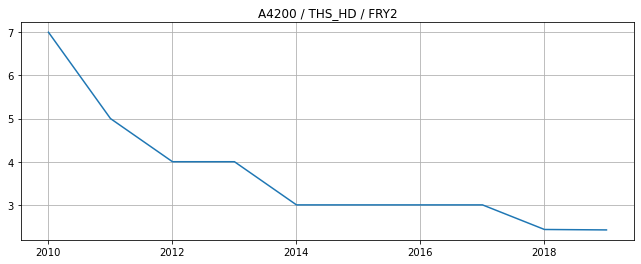

In [49]:
i=np.random.randint(len(df))
df.iloc[i,3:].plot( 
    grid=True,
    figsize=(11,4),
    title=' / '.join( df.iloc[i,:3].to_list() ) 
)

----

In [50]:
import wikipedia as wkp

wkp.set_lang('ru')

In [51]:
l = wkp.search('новичок')

In [52]:
print(l)

['Новичок', 'Новичок (отравляющие вещества)', 'Новобранец (телесериал, 2018)', 'Новичок (фильм, 1990)', 'Новичок года НБА', 'Хэнкок, Джон Ли', 'Отравление Алексея Навального', 'Отравление Сергея и Юлии Скрипаль', 'Новичок (мультфильм)', 'Ан-12']


In [53]:
print( wkp.summary(l[1], sentences=1) )

«Новичо́к» (англ.


In [54]:
p = wkp.page(l[1])

In [55]:
print(p.title)

Новичок (отравляющие вещества)


In [56]:
print(p.url)

https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D0%B2%D0%B8%D1%87%D0%BE%D0%BA_(%D0%BE%D1%82%D1%80%D0%B0%D0%B2%D0%BB%D1%8F%D1%8E%D1%89%D0%B8%D0%B5_%D0%B2%D0%B5%D1%89%D0%B5%D1%81%D1%82%D0%B2%D0%B0)


In [57]:
print(p.links[:3],'....\n')

['1,2-Дихлорэтан', '1-метокси-1,3,5-циклогептатриен', 'Bellingcat'] ....



In [58]:
print(p.content+'\n')

«Новичо́к» (англ. Novichok, Novichok agent) — семейство фторфосфорорганических азоторганических отравляющих веществ нервно-паралитического действия. Разрабатывались в качестве боевых отравляющих веществ в СССР и России в период с начала 1970-х по начало 1990-х годов, а также, в научно-исследовательских целях, в ряде стран НАТО. Из-за секретности этих разработок и возможной дезинформации со стороны спецслужб данные о химической структуре этих веществ скудны, ненадёжны и противоречивы.
Вещества семейства «Новичок» приобрели широкую известность после того, как в марте 2018 года одно из них использовали для отравления Сергея и Юлии Скрипаль. В ноябре 2019 года четыре из веществ, известных как «Новички», были включены в Список 1 Организации по запрещению химического оружия:

А-230: метил (1-(диэтиламино)­этилиден)­амидофторфосфонат (рисунок 1а);
А-232: метил (1-(диэтиламино)­этилиден)­амидофторфосфат (рисунок 1б), разрабатывался для использования в качестве боевого отравляющего вещества под

----

----

In [59]:
!wget -c https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip

--2021-02-09 10:43:43--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Загружен сертификат CA «/etc/ssl/certs/ca-certificates.crt»
Распознаётся s3.amazonaws.com (s3.amazonaws.com)… 52.216.142.174
Подключение к s3.amazonaws.com (s3.amazonaws.com)|52.216.142.174|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 13565642 (13M) [application/zip]
Сохранение в: «jena_climate_2009_2016.csv.zip»

jena_climate_2009_2 100%[===================>]  12,94M  1,70MB/s    за 12s     

2021-02-09 10:43:57 (1,04 MB/s) - «jena_climate_2009_2016.csv.zip» сохранён [13565642/13565642]



In [60]:
%matplotlib inline

In [63]:
!ls

01-jupyter.ipynb  03-numpy.ipynb   jena_climate_2009_2016.csv.zip
02-python.ipynb   04-pandas.ipynb  jupyter_decor.ipynb


In [65]:
!unzip -d jena_climate jena_climate_2009_2016.csv.zip

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate/jena_climate_2009_2016.csv  
  inflating: jena_climate/__MACOSX/._jena_climate_2009_2016.csv  


In [66]:
import pandas as pd

f = 'jena_climate/jena_climate_2009_2016.csv'
df = pd.read_csv(f)
print(len(df))

420451


In [67]:
df.dtypes

Date Time           object
p (mbar)           float64
T (degC)           float64
Tpot (K)           float64
Tdew (degC)        float64
rh (%)             float64
VPmax (mbar)       float64
VPact (mbar)       float64
VPdef (mbar)       float64
sh (g/kg)          float64
H2OC (mmol/mol)    float64
rho (g/m**3)       float64
wv (m/s)           float64
max. wv (m/s)      float64
wd (deg)           float64
dtype: object

In [68]:
df['Date Time'] = pd.to_datetime(df['Date Time'])

In [69]:
df.iloc[:,1:].values

array([[ 9.97e+02, -8.02e+00,  2.65e+02, ...,  1.03e+00,  1.75e+00,
         1.52e+02],
       [ 9.97e+02, -8.41e+00,  2.65e+02, ...,  7.20e-01,  1.50e+00,
         1.36e+02],
       [ 9.97e+02, -8.51e+00,  2.65e+02, ...,  1.90e-01,  6.30e-01,
         1.72e+02],
       ...,
       [ 1.00e+03, -3.16e+00,  2.70e+02, ...,  1.08e+00,  2.00e+00,
         2.15e+02],
       [ 1.00e+03, -4.23e+00,  2.69e+02, ...,  1.49e+00,  2.16e+00,
         2.26e+02],
       [ 1.00e+03, -4.82e+00,  2.68e+02, ...,  1.23e+00,  1.96e+00,
         1.85e+02]])

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),420451.0,989.212508,8.359454,913.60,984.20,989.57,994.72,1015.35
T (degC),420451.0,9.448567,8.423685,-23.01,3.36,9.41,15.47,37.28
Tpot (K),420451.0,283.491182,8.504820,250.60,277.43,283.46,289.53,311.34
Tdew (degC),420451.0,4.954011,6.730411,-25.01,0.24,5.21,10.07,23.11
rh (%),420451.0,76.007045,16.477126,12.95,65.21,79.30,89.40,100.00
VPmax (mbar),420451.0,13.575089,7.739481,0.95,7.78,11.82,17.60,63.77
VPact (mbar),420451.0,9.532524,4.183895,0.79,6.21,8.86,12.35,28.32
VPdef (mbar),420451.0,4.042483,4.897270,0.00,0.87,2.19,5.30,46.01
sh (g/kg),420451.0,6.021630,2.655973,0.50,3.92,5.59,7.80,18.13
H2OC (mmol/mol),420451.0,9.638982,4.235130,0.80,6.29,8.96,12.48,28.82


In [71]:
df['wv (m/s)'] = df['wv (m/s)'].apply(lambda x: max(0.,x) )
df['max. wv (m/s)'] = df['max. wv (m/s)'].apply(lambda x: max(0.,x) )

<AxesSubplot:xlabel='Date Time'>

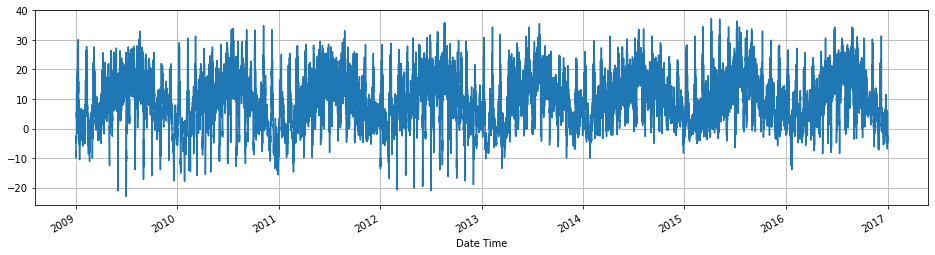

In [72]:
df.set_index('Date Time')['T (degC)'].plot(
    figsize=(16,4),
    grid=True,
)

<AxesSubplot:ylabel='Frequency'>

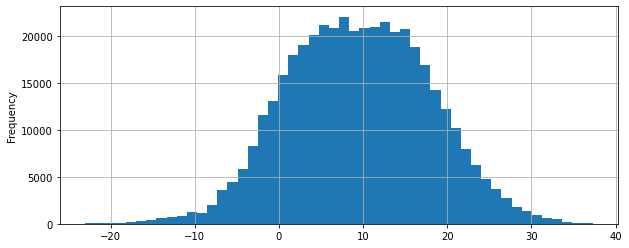

In [73]:
df.set_index('Date Time')['T (degC)'].plot.hist(
    figsize=(10,4),
    grid=True,
    bins=50
)

<AxesSubplot:ylabel='Density'>

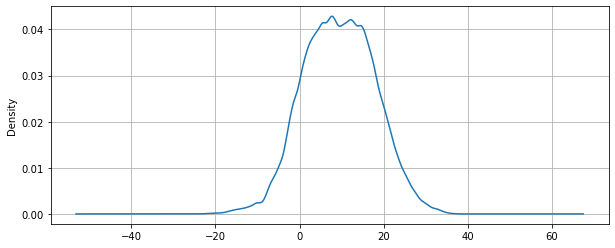

In [74]:
df.set_index('Date Time')['T (degC)'].plot.kde(
    figsize=(10,4),
    grid=True
)

In [75]:
from math import ceil

In [76]:
fet=(len(df.columns)-1) # количество признаков
cols=2 # количество колонок на картинке с графиками
rows=int(ceil(fet/cols)) # количество строк на картинке с графиками

fet,cols,rows

(14, 2, 7)

array([[<AxesSubplot:xlabel='Date Time'>,
        <AxesSubplot:xlabel='Date Time'>],
       [<AxesSubplot:xlabel='Date Time'>,
        <AxesSubplot:xlabel='Date Time'>],
       [<AxesSubplot:xlabel='Date Time'>,
        <AxesSubplot:xlabel='Date Time'>],
       [<AxesSubplot:xlabel='Date Time'>,
        <AxesSubplot:xlabel='Date Time'>],
       [<AxesSubplot:xlabel='Date Time'>,
        <AxesSubplot:xlabel='Date Time'>],
       [<AxesSubplot:xlabel='Date Time'>,
        <AxesSubplot:xlabel='Date Time'>],
       [<AxesSubplot:xlabel='Date Time'>,
        <AxesSubplot:xlabel='Date Time'>]], dtype=object)

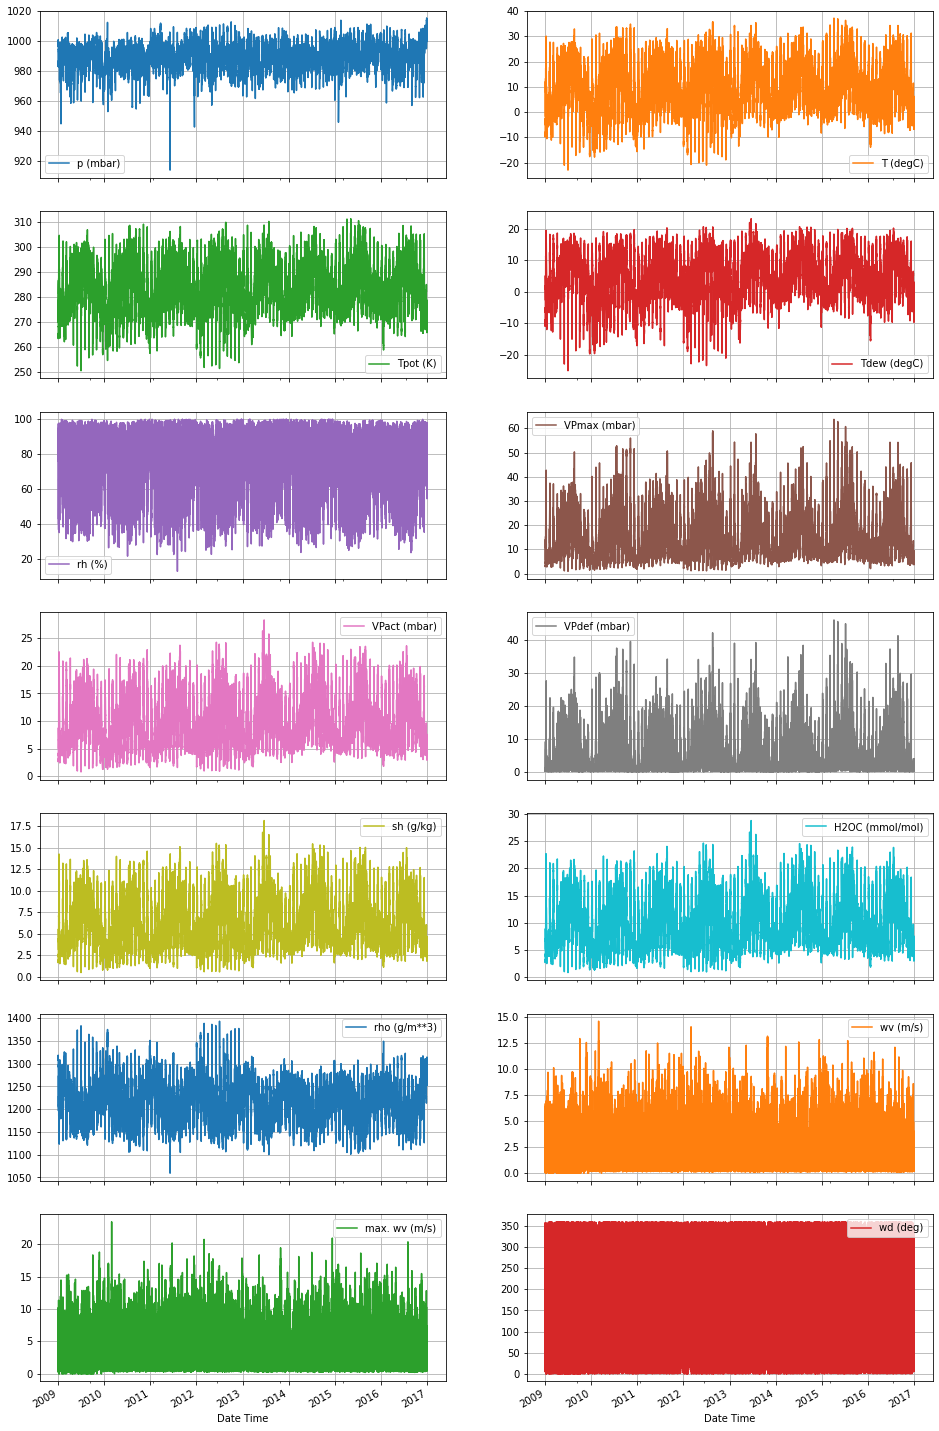

In [77]:
df.set_index('Date Time').plot(
    figsize=(16,4*rows),
    grid=True,
    subplots=True,
    layout=(rows,cols)
)

In [89]:
# fet=(len(df.columns)-1)
# cols=3
# rows=int(ceil(fet/cols))

# fet,cols,rows

In [81]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

CPU times: user 9.72 s, sys: 0 ns, total: 9.72 s
Wall time: 9.71 s


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

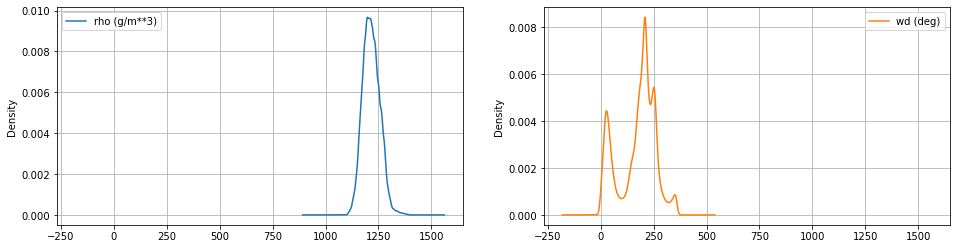

In [88]:
%%time

df[['Date Time','rho (g/m**3)','wd (deg)']].set_index('Date Time').plot.kde(
    figsize=(16,4),
    grid=True,
    subplots=True,
    layout=(1,2)
)

---

In [ ]:
# упражнения

# https://github.com/ajcr/100-pandas-puzzles